In [1]:
import geopandas as gpd # Loading geospatial data
import pandas as pd # Tabular data
from taumahi import kupu_māori # Detecting Māori words)
pd.set_option('display.max_rows', 200)

In [2]:
df = gpd.read_file("lds-nz-roads-addressing-FGDB.zip!nz-roads-addressing.gdb")
df

road_id   geometry_class road_type   road_name_class  \
0      3073671  Addressing Road   Unknown  Road Designation   
1      3073717  Addressing Road   Unknown  Road Designation   
2      3073674  Addressing Road   Unknown  Road Designation   
3      3073698  Addressing Road   Unknown  Road Designation   
4      3073673  Addressing Road   Unknown  Road Designation   
...        ...              ...       ...               ...   
78940  3033968  Addressing Road   Unknown              Road   
78941  3036998  Addressing Road   Unknown              Road   
78942  3040670  Addressing Road   Unknown              Road   
78943  3049837  Addressing Road   Unknown              Road   
78944  3056843  Addressing Road   Unknown              Road   

                  full_road_name       road_name_label road_name_prefix  \
0              State Highway 73A                SH 73A             None   
1               State Highway 71                 SH 71             None   
2               State Highway 53                 SH 53             None   
3               State Highway 62                 SH 62             None   
4              State Highway 20A                SH 20A             None   
...                          ...                   ...              ...   
78940               Jones Avenue             Jones Ave             None   
78941              Wanganui Road           Wanganui Rd             None   
78942  Wellington Urban Motorway  Wellington Urban Mwy             None   
78943                Ahuroa Road             Ahuroa Rd             None   
78944                Tunnel Road             Tunnel Rd             None   

         road_name_body road_name_type road_name_suffix route_name_body  \
0                  None           None             None   State Highway   
1                  None           None             None   State Highway   
2                  None           None             None   State Highway   
3                  None           None             None   State Highway   
4                  None           None             None   State Highway   
...                 ...            ...              ...             ...   
78940             Jones         Avenue             None            None   
78941          Wanganui           Road             None            None   
78942  Wellington Urban       Motorway             None            None   
78943            Ahuroa           Road             None            None   
78944            Tunnel           Road             None            None   

       route_name_number route_name_alpha route_name_suffix  \
0                   73.0                A              None   
1                   71.0             None              None   
2                   53.0             None              None   
3                   62.0             None              None   
4                   20.0                A              None   
...                  ...              ...               ...   
78940                NaN             None              None   
78941                NaN             None              None   
78942                NaN             None              None   
78943                NaN             None              None   
78944                NaN             None              None   

            full_road_name_ascii road_name_label_ascii road_name_body_ascii  \
0              State Highway 73A                SH 73A                 None   
1               State Highway 71                 SH 71                 None   
2               State Highway 53                 SH 53                 None   
3               State Highway 62                 SH 62                 None   
4              State Highway 20A                SH 20A                 None   
...                          ...                   ...                  ...   
78940               Jones Avenue             Jones Ave                Jones   
78941              Wanganui Road           Wanganui Rd     

In [3]:
df["is_māori"] = df.full_road_name[~pd.isna(df.full_road_name)].apply(lambda name: len(kupu_māori(name)) > 0)
df.is_māori.value_counts(dropna=False)

is_māori
False    61179
True     14577
NaN       3189
Name: count, dtype: int64

In [4]:
display(df[df.is_māori == True][["full_road_name", "is_māori"]])
display(df[df.is_māori == False][["full_road_name", "is_māori"]])

full_road_name is_māori
5      State Highway 30 Te Teko     True
140               Marama Street     True
148                  Wiremu Way     True
162                Matai Street     True
172                Tawiri Place     True
...                         ...      ...
78931                 Mera Road     True
78938            Hamiora Street     True
78939             Atawhai Drive     True
78941             Wanganui Road     True
78943               Ahuroa Road     True

[14577 rows x 2 columns]

full_road_name is_māori
0              State Highway 73A    False
1               State Highway 71    False
2               State Highway 53    False
3               State Highway 62    False
4              State Highway 20A    False
...                          ...      ...
78936            Woodford Avenue    False
78937                Laban Place    False
78940               Jones Avenue    False
78942  Wellington Urban Motorway    False
78944                Tunnel Road    False

[61179 rows x 2 columns]

Text(0.5, 1.0, 'Road names containing Māori words in NZ')

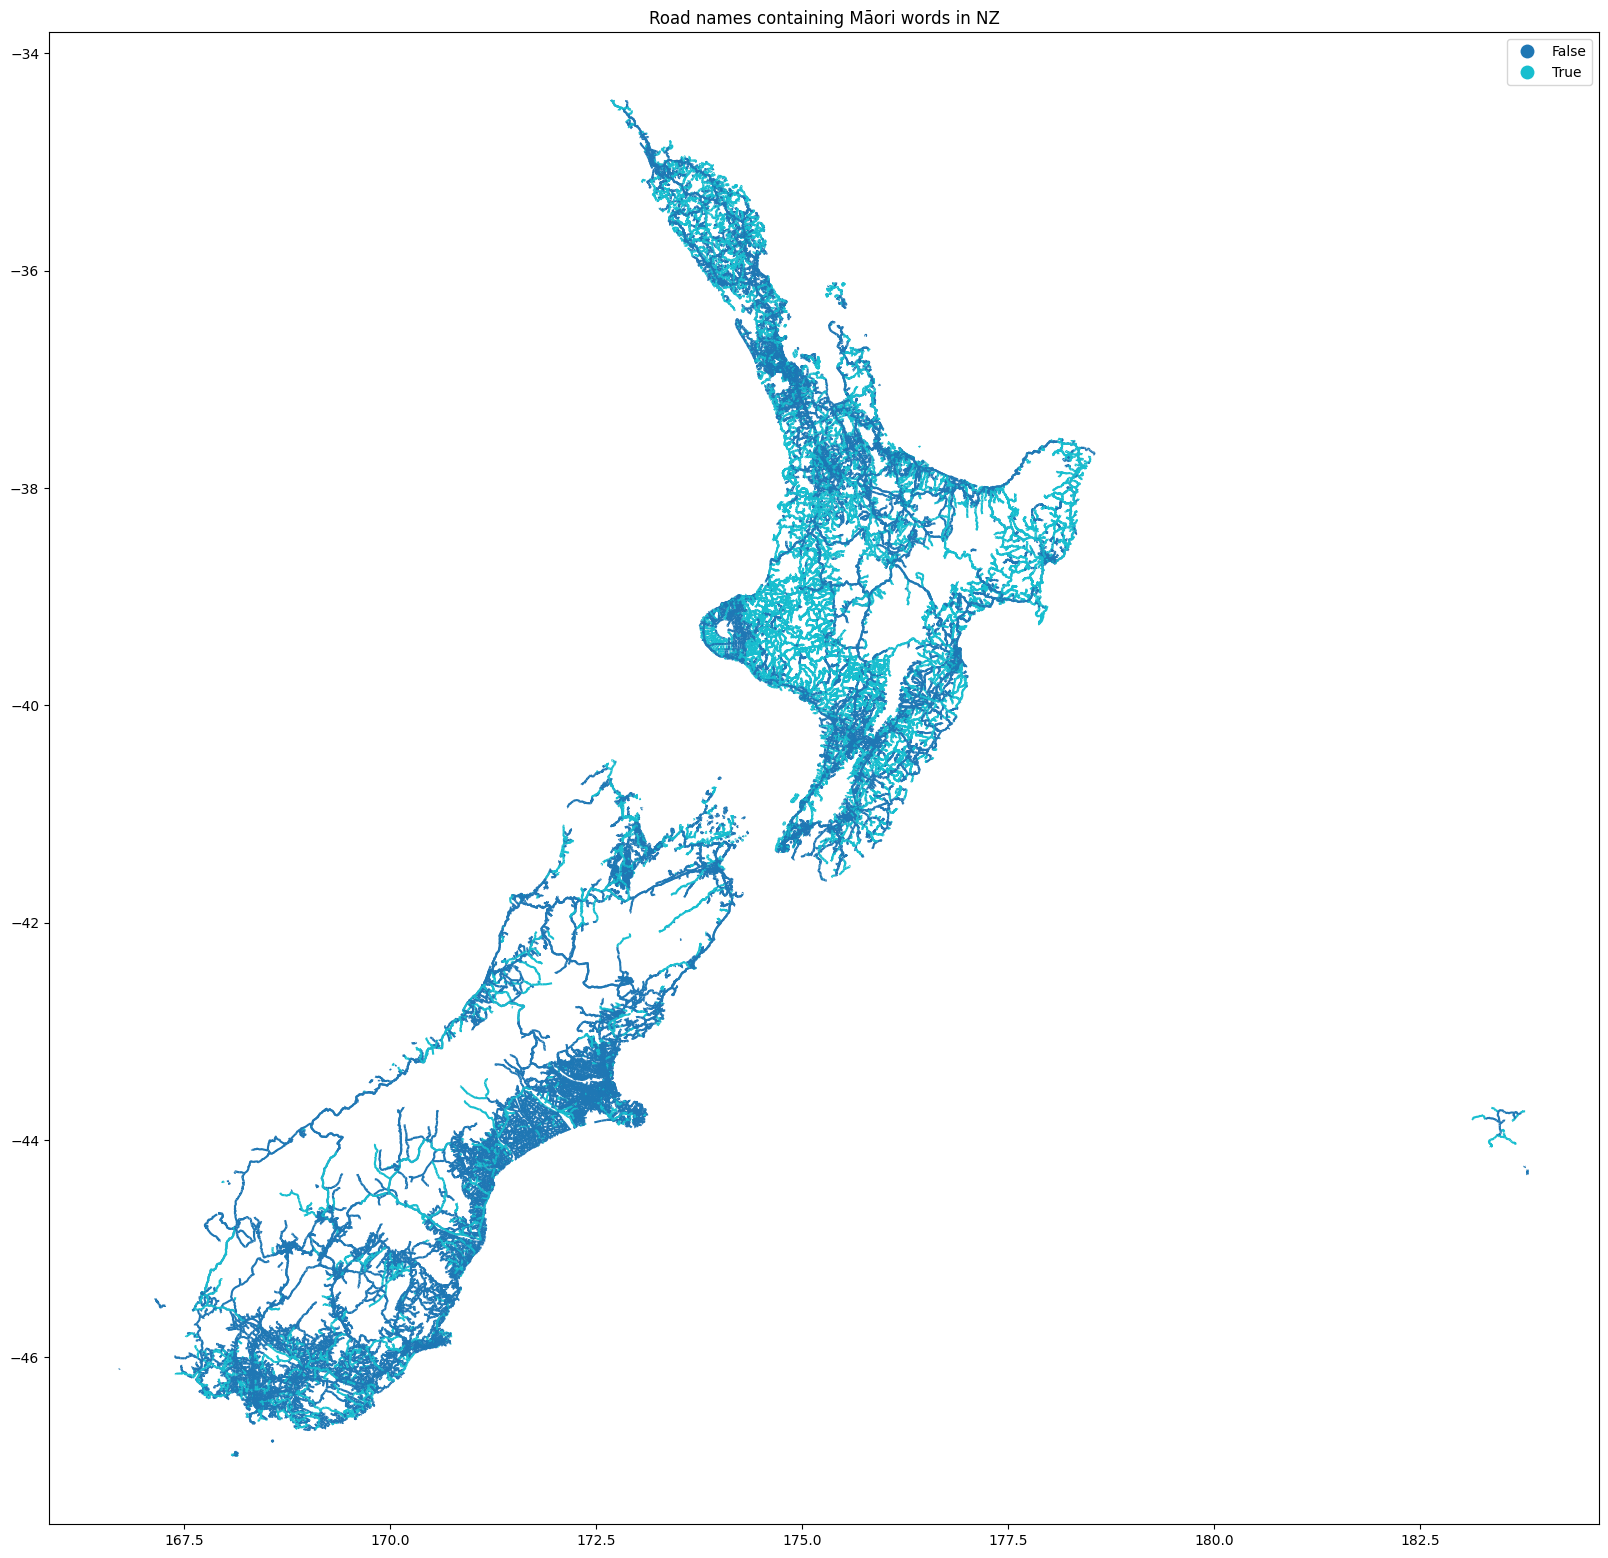

In [5]:
ax = df.plot(column="is_māori", legend=True, figsize=(20,20), categorical=True)
ax.set_title("Road names containing Māori words in NZ")

In [6]:
df.to_file("lds-nz-roads-addressing-kupu_māori.gpkg", layer='roads', driver="GPKG")

In [7]:
akl = gpd.clip(df, (174.3311,-37.1231,175.2470,-36.6464))
akl

road_id   geometry_class road_type   road_name_class  \
130    3073727  Addressing Road   Unknown  Road Designation   
37892  1823659  Addressing Road   Unknown              Road   
68548  3057113  Addressing Road   Unknown              Road   
19975  1831287  Addressing Road   Unknown              Road   
3205   1823658  Addressing Road   Unknown              Road   
...        ...              ...       ...               ...   
5240   1830965  Addressing Road   Unknown              Road   
36277  1821018  Addressing Road   Unknown              Road   
69186  3001933  Addressing Road   Unknown              Road   
121    3073667  Addressing Road   Unknown  Road Designation   
70901  3007739  Addressing Road   Unknown              Road   

              full_road_name    road_name_label road_name_prefix  \
130          State Highway 1               SH 1             None   
37892           Whatipu Road         Whatipu Rd             None   
68548    Taimana Stream Road  Taimana Stream Rd             None   
19975            McKay Place           McKay Pl             None   
3205            Erangi Place          Erangi Pl             None   
...                      ...                ...              ...   
5240               Hull Road            Hull Rd             None   
36277          Anderson Road        Anderson Rd             None   
69186    Kahikatea Flat Road  Kahikatea Flat Rd             None   
121         State Highway 16              SH 16             None   
70901  Kaipara Coast Highway  Kaipara Coast Hwy             None   

       road_name_body road_name_type road_name_suffix route_name_body  \
130              None           None             None   State Highway   
37892         Whatipu           Road             None            None   
68548  Taimana Stream           Road             None            None   
19975           McKay          Place             None            None   
3205           Erangi          Place             None            None   
...               ...            ...              ...             ...   
5240             Hull           Road             None            None   
36277        Anderson           Road             None            None   
69186  Kahikatea Flat           Road             None            None   
121              None           None             None   State Highway   
70901   Kaipara Coast        Highway             None            None   

       route_name_number route_name_alpha route_name_suffix  \
130                  1.0             None              None   
37892                NaN             None              None   
68548                NaN             None              None   
19975                NaN             None              None   
3205                 NaN             None              None   
...                  ...              ...               ...   
5240                 NaN             None              None   
36277                NaN             None              None   
69186                NaN             None              None   
121                 16.0             None              None   
70901                NaN             None              None   

        full_road_name_ascii road_name_label_ascii road_name_body_ascii  \
130          State Highway 1                  SH 1                 None   
37892           Whatipu Road            Whatipu Rd              Whatipu   
68548    Taimana Stream Road     Taimana Stream Rd       Taimana Stream   
19975            McKay Place              McKay Pl                McKay   
3205            Erangi Place             Erangi Pl               Erangi   
...                      ...                   ...                  ...   
5240               Hull Road               Hull Rd                 Hull   
36277          Anderson Road           Anderson Rd             Anderson   
69186    Kahikatea Flat Road     Kahikatea Flat Rd       Kahikatea Flat   
121         State Highway 16                 SH 1

(-37.1231, -36.6464)

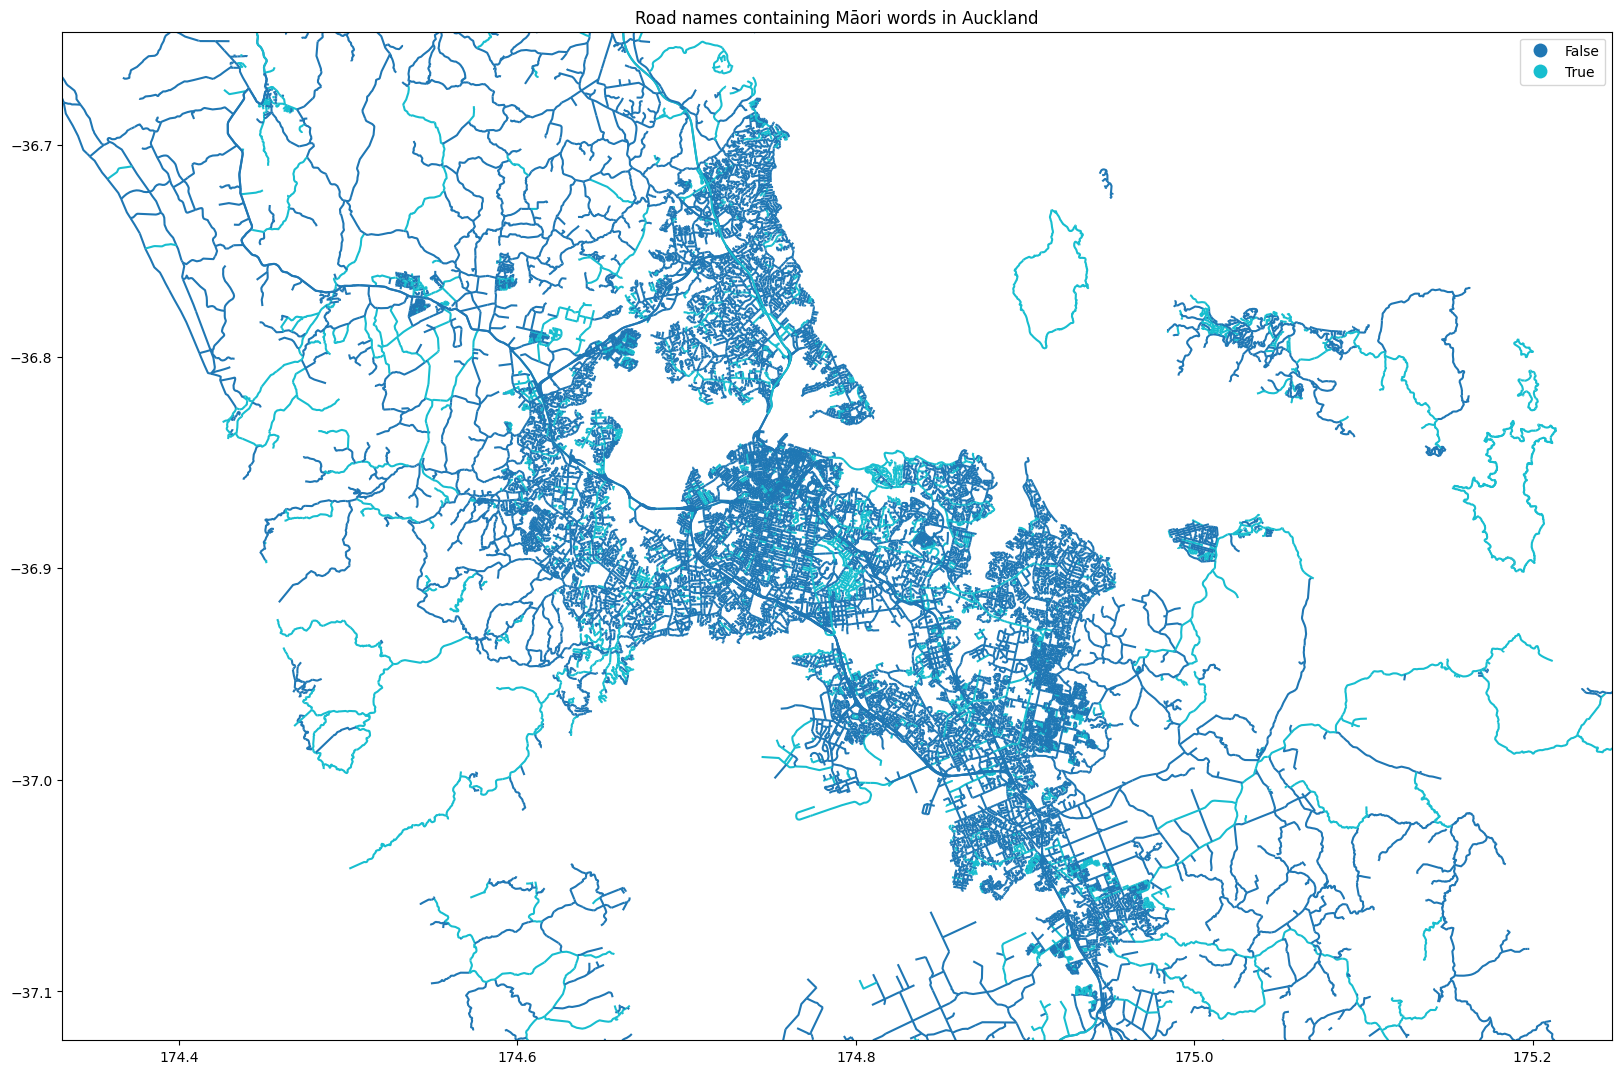

In [8]:
ax = akl.plot(column="is_māori", legend=True, figsize=(20,20), categorical=True)
ax.set_title("Road names containing Māori words in Auckland")
ax.set_xlim(174.3311,175.2470)
ax.set_ylim(-37.1231,-36.6464)

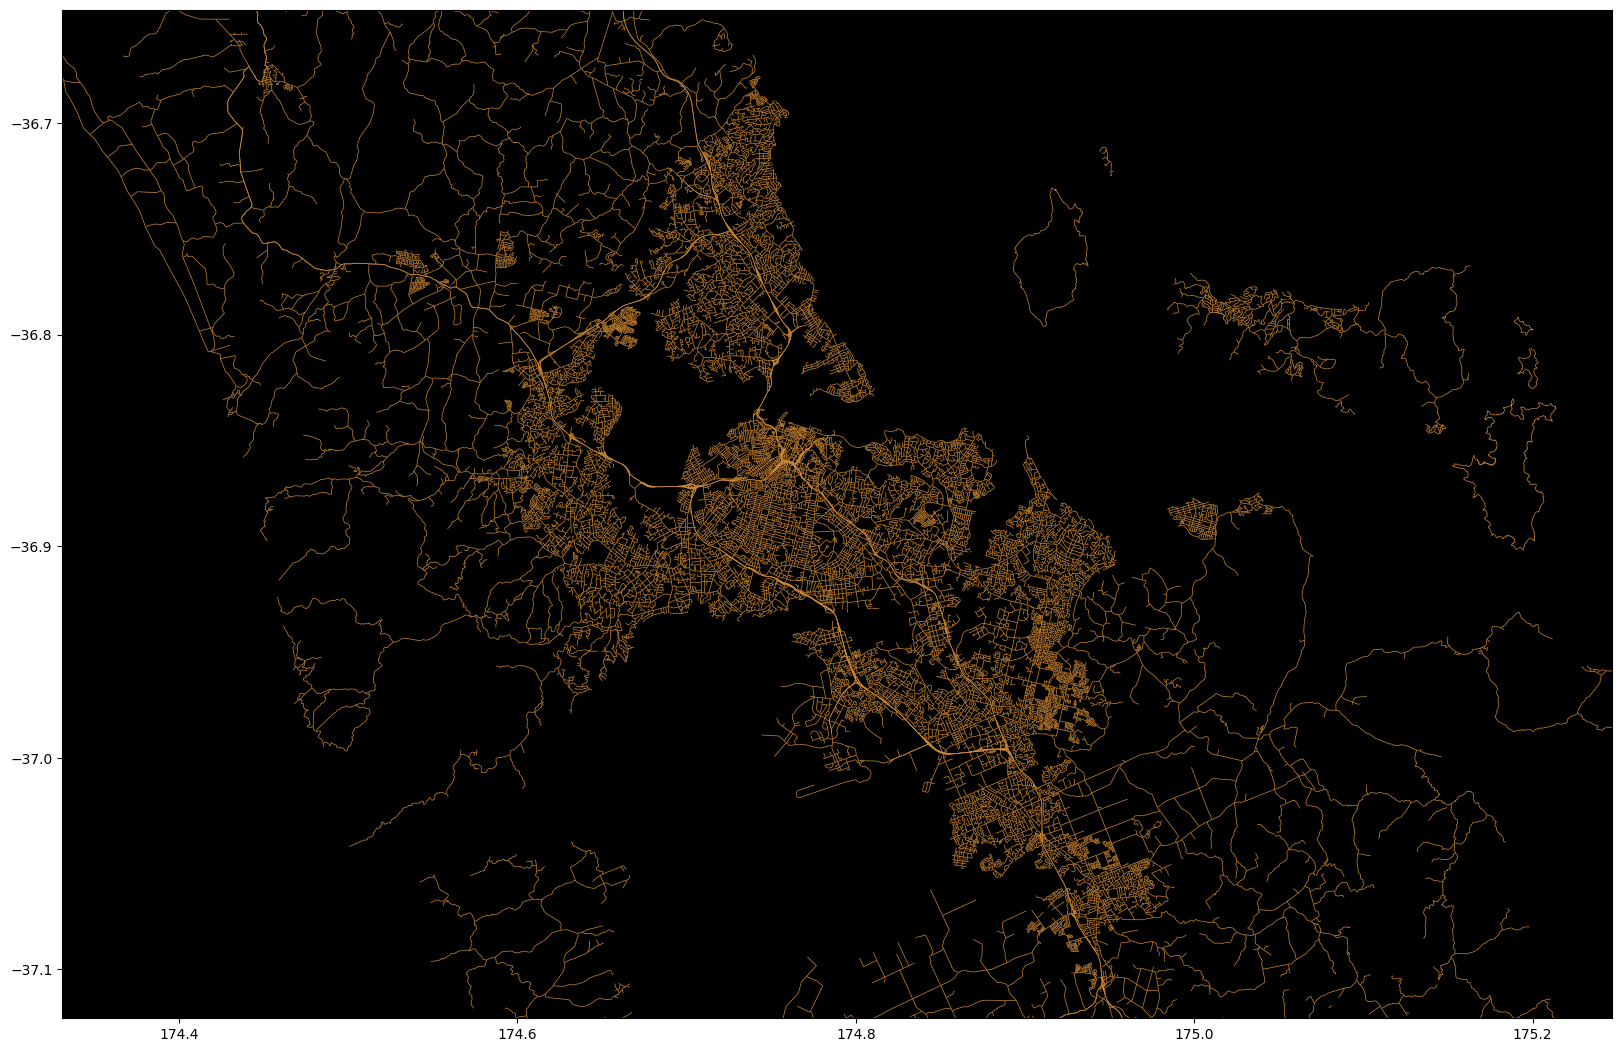

In [9]:
from shapely import box
ax = gpd.GeoSeries([box(*akl.total_bounds)]).plot(color="black", figsize=(20,20))
akl.plot(color="#CD8833", ax=ax, linewidth=.5)
ax.set_xlim(174.3311,175.2470)
ax.set_ylim(-37.1231,-36.6464)
ax.figure.savefig("auckland_roads.png", bbox_inches="tight", dpi=1200)

In [10]:
akl["length"] = akl.to_crs(2193).length

(-37.1231, -36.6464)

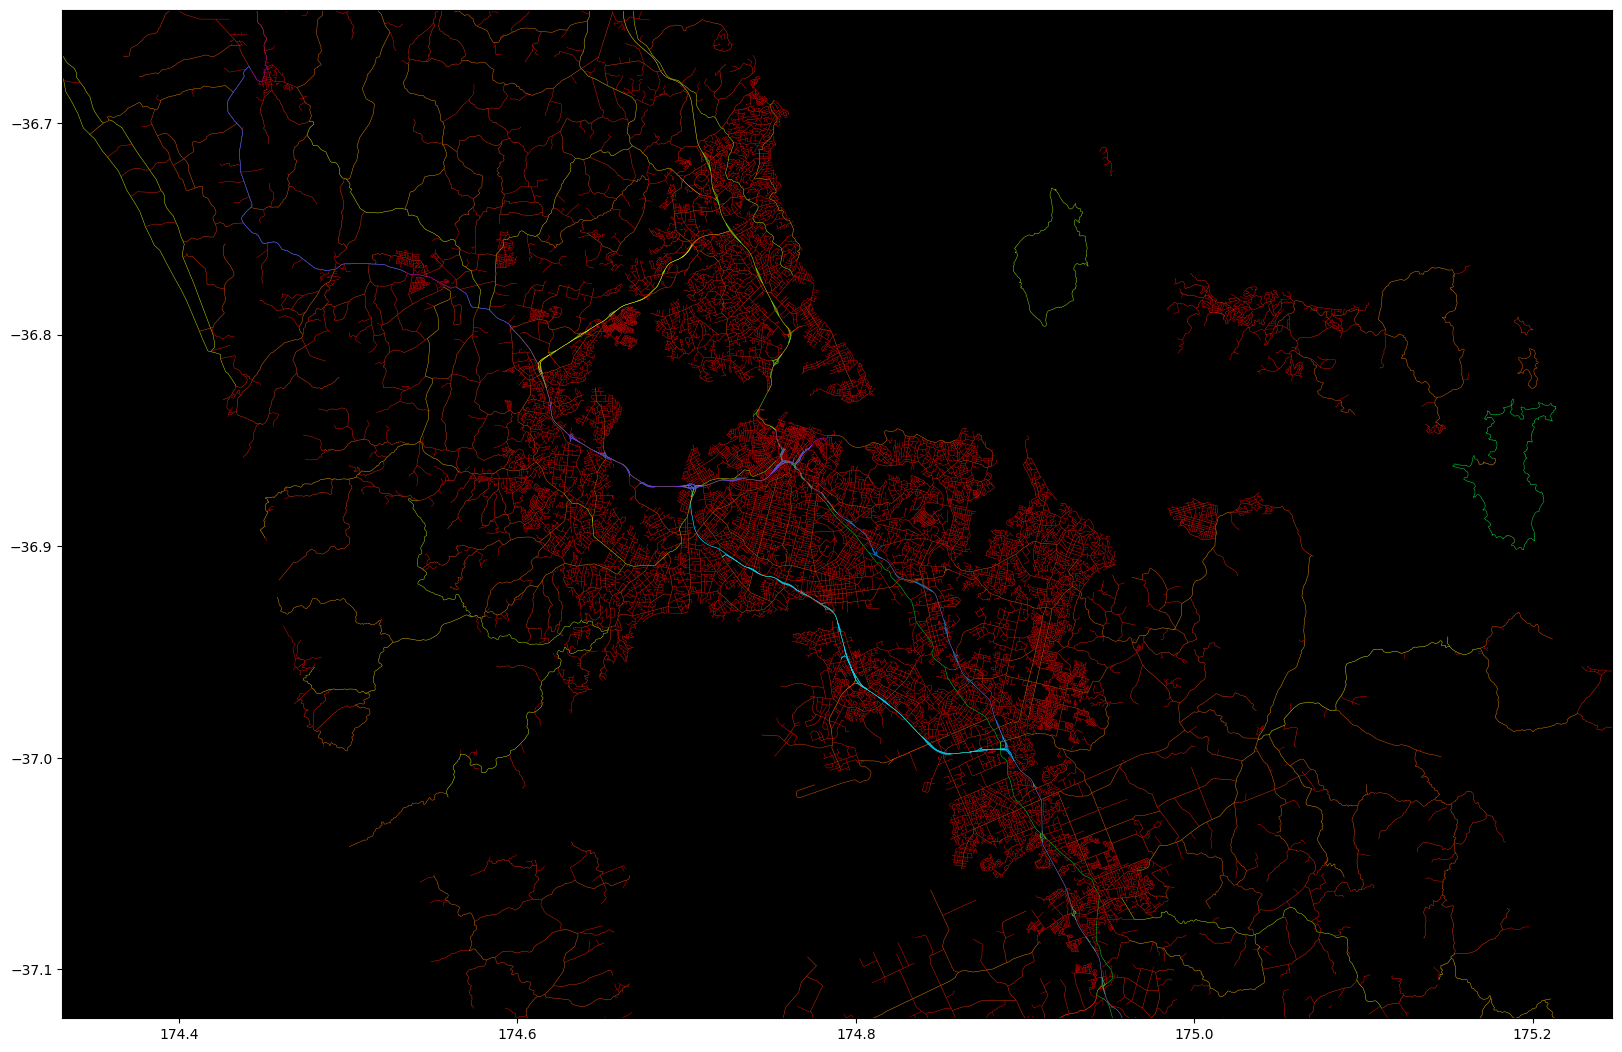

In [11]:
from matplotlib import pyplot as plt
ax = gpd.GeoSeries([box(*akl.total_bounds)]).plot(color="black", figsize=(20,20))
akl.plot("length", ax=ax, linewidth=.3, figsize=(20,20), cmap="hsv")
ax.set_xlim(174.3311,175.2470)
ax.set_ylim(-37.1231,-36.6464)

(-37.1231, -36.6464)

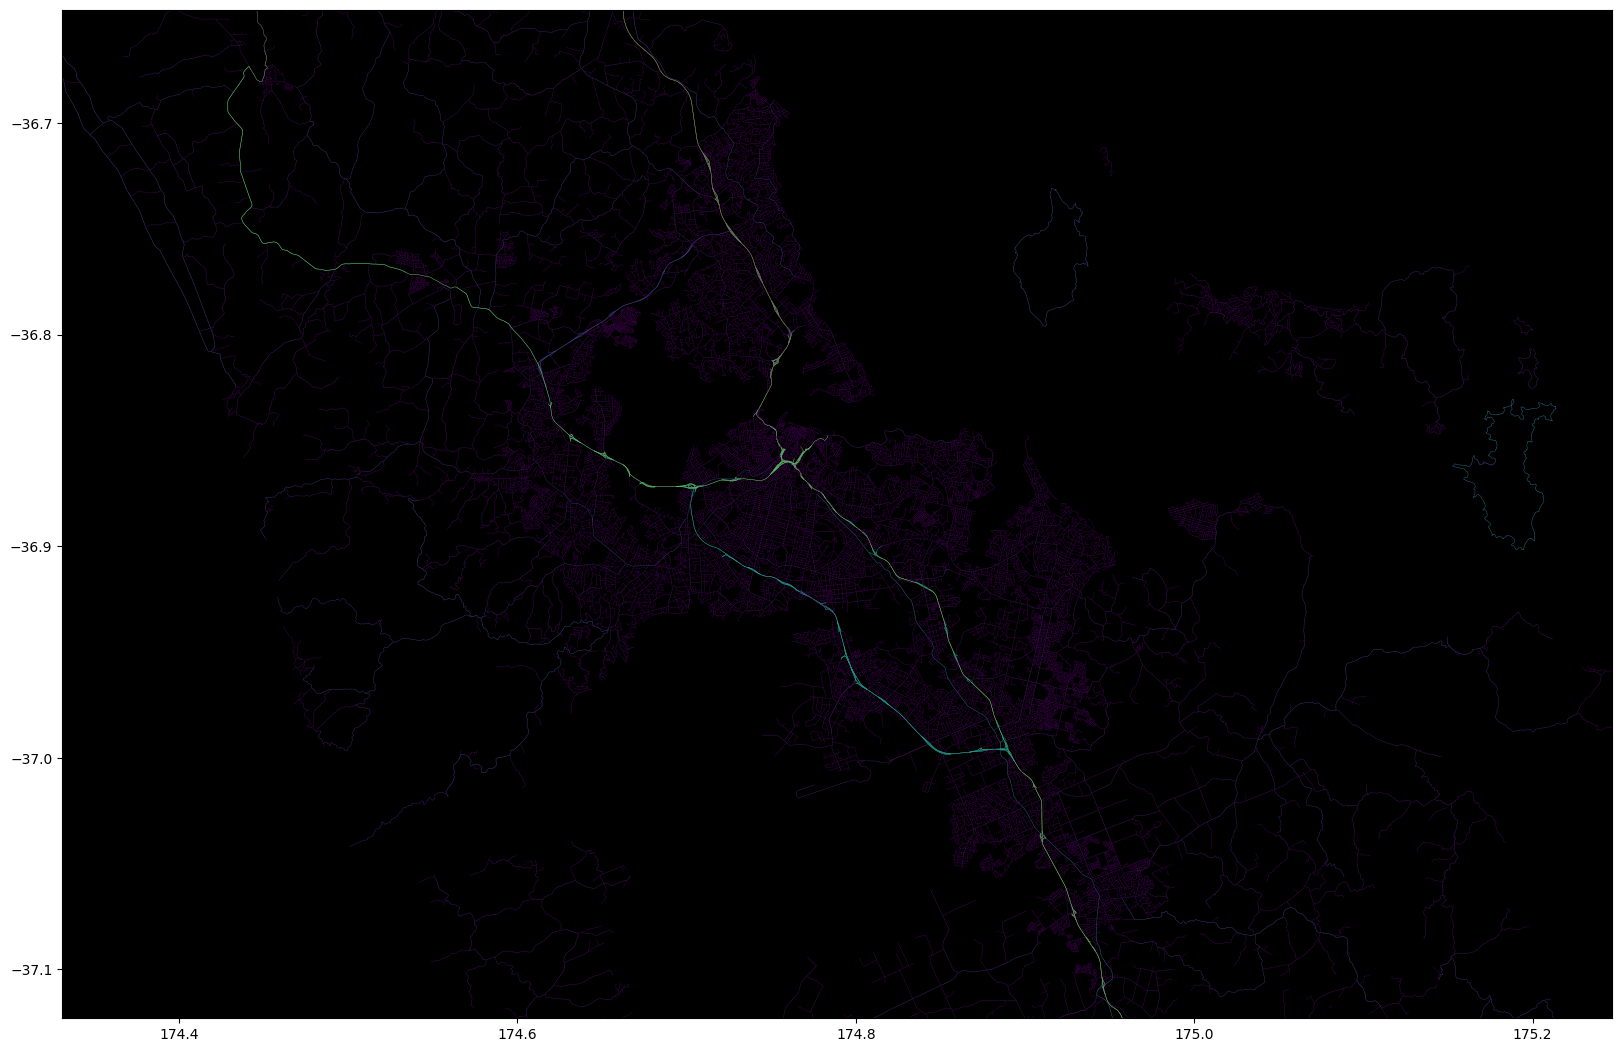

In [12]:
ax = gpd.GeoSeries([box(*akl.total_bounds)]).plot(color="black", figsize=(20,20))
akl.plot("length", ax=ax, linewidth=.3, figsize=(20,20))
ax.set_xlim(174.3311,175.2470)
ax.set_ylim(-37.1231,-36.6464)

<Axes: >

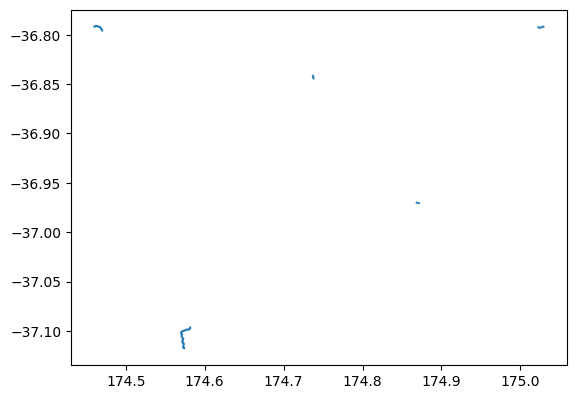

In [21]:
akl[akl.full_road_name.str.contains("Hamilton Road",na=False)].plot()

In [25]:
with open('akl.svg', 'w') as f:
    f.write(akl.unary_union._repr_svg_())